定义参数

In [112]:
diffCoeff = 0.1  # 扩散系数
convCoeff = (0.1,)  # 流速
Lx = 2.  # 长度
valueLeft = 1.  # 左边界
valueRight = 0.  # 右边界
timeStepDuration = 0.05 # 时间步长
steps = 70 # 70个时间步
f_phi0 = lambda x: (20 * x - 11) / 9 # 初始条件的函数

定义网格

In [113]:
from fipy import Grid1D

nx = 10  # 节点数
mesh = Grid1D(dx=Lx / nx, nx=nx)  # 一维网格

In [114]:
mesh

UniformGrid1D(dx=0.2, nx=10)

In [115]:
pos = mesh.x.value
pos

array([0.1, 0.3, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5, 1.7, 1.9])

定义变量

In [116]:
from fipy import CellVariable

phi = CellVariable(mesh=mesh, value=f_phi0(pos), hasOld=True, name='phi')

In [117]:
phi.__class__

fipy.variables.cellVariable.CellVariable

第一类边界条件

In [118]:
valueLeft = 1
valueRight = 0
phi.constrain(valueLeft, mesh.facesLeft)
phi.constrain(valueRight, mesh.facesRight)

`facesLeft` 的索引是 `0.0`

In [119]:
mesh.facesLeft

(FaceVariable(value=array([[0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]]), mesh=UniformGrid1D(dx=0.2, nx=10))[index] == 0.0)

`facesRight` 的索引是 `2.0`

In [120]:
mesh.facesRight

(FaceVariable(value=array([[0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]]), mesh=UniformGrid1D(dx=0.2, nx=10))[index] == 2.0)

把图画出来看看

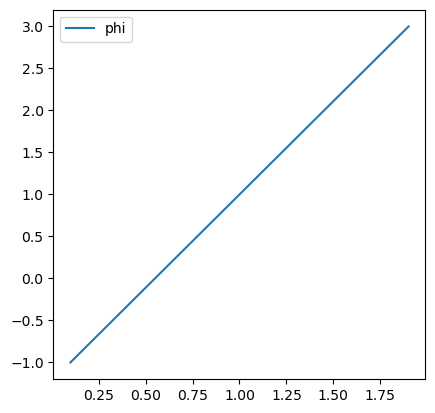

In [121]:
from fipy import Viewer

viewer = Viewer(vars=phi)

定义方程
$$\frac{\partial\phi}{\partial t}+u\frac{\partial\phi}{\partial x}=\frac{\Gamma}{\rho}\frac{\partial^2\phi}{\partial x^2}$$

In [122]:
from fipy import TransientTerm, HybridConvectionTerm, DiffusionTerm

eqn = TransientTerm() + HybridConvectionTerm(coeff=convCoeff) == DiffusionTerm(coeff=diffCoeff)

求解

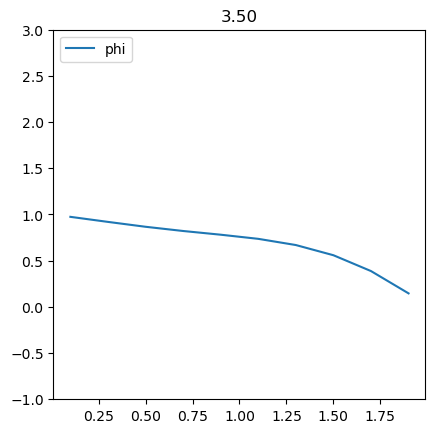

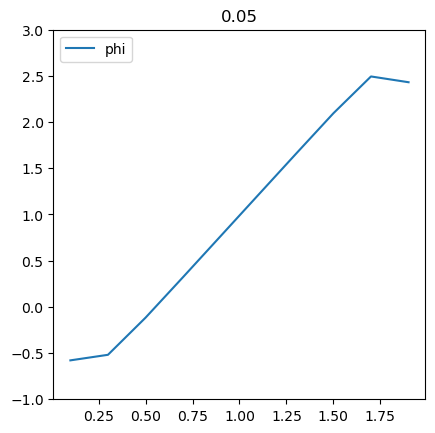

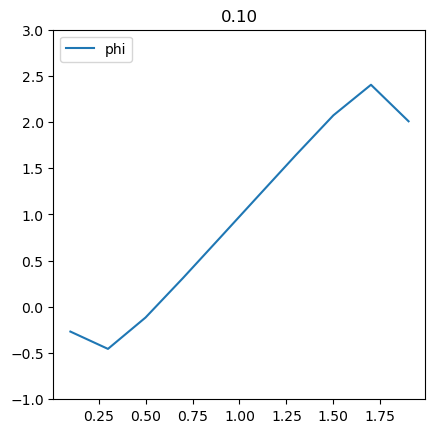

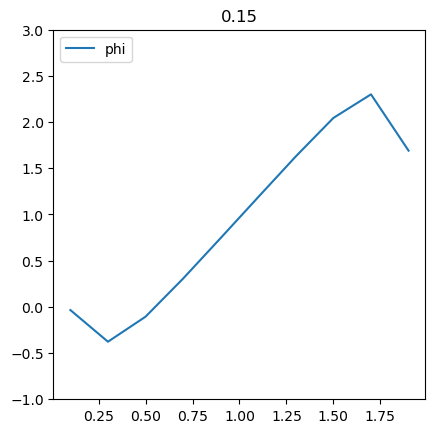

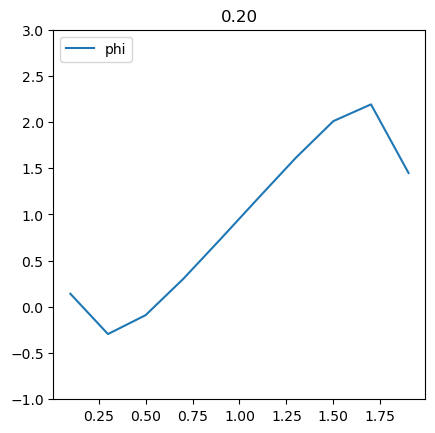

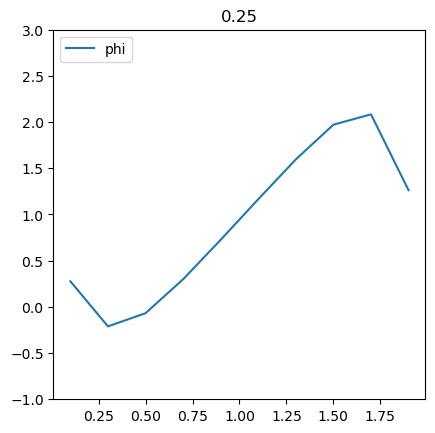

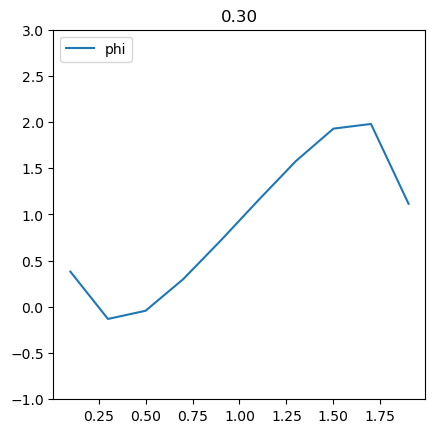

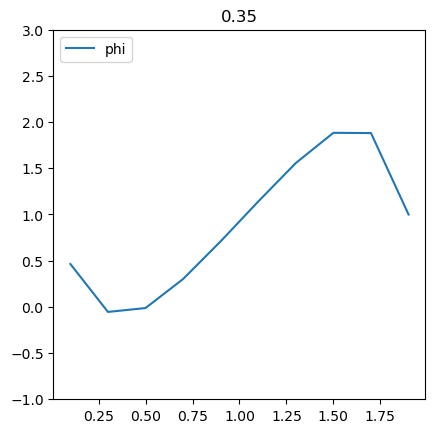

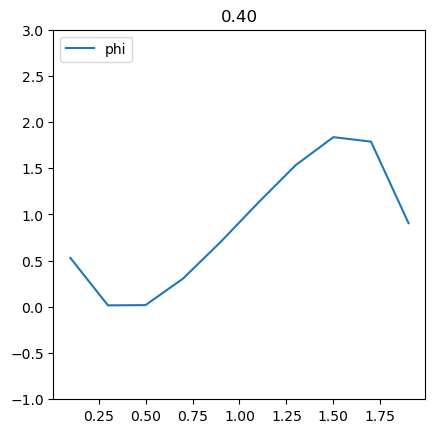

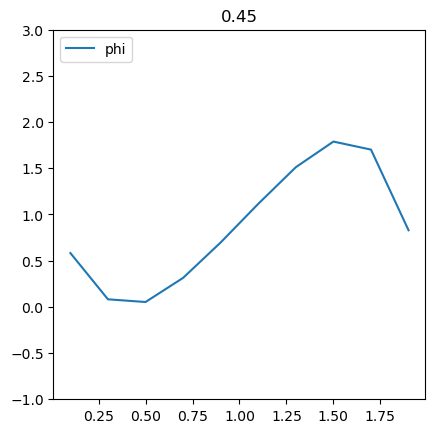

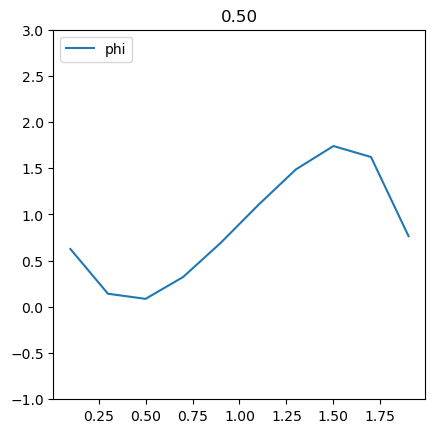

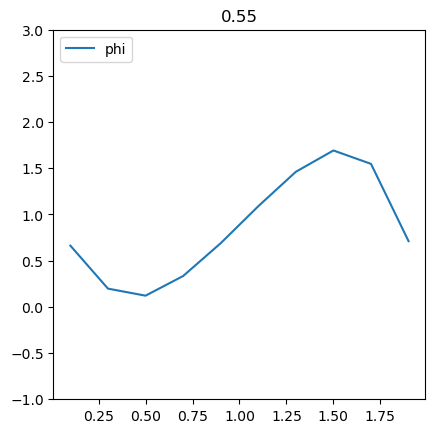

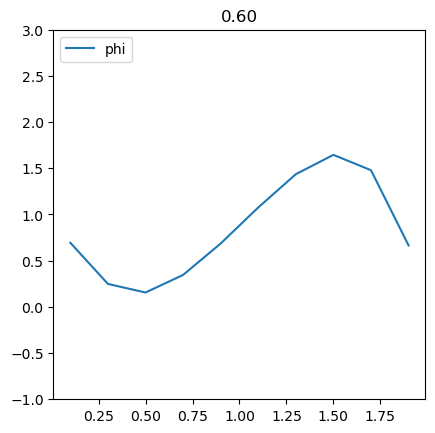

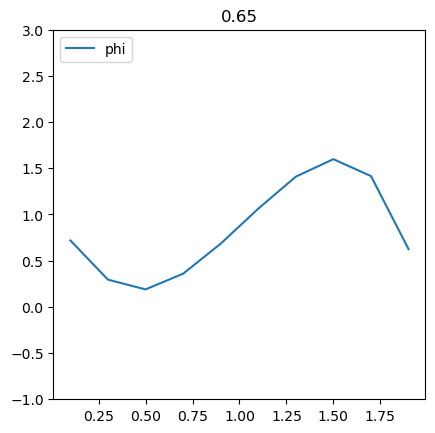

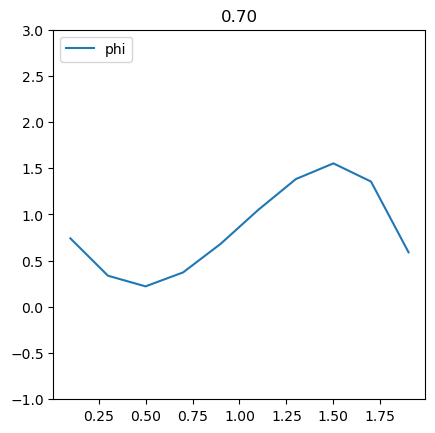

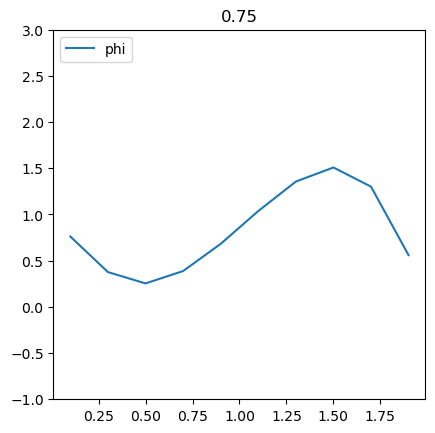

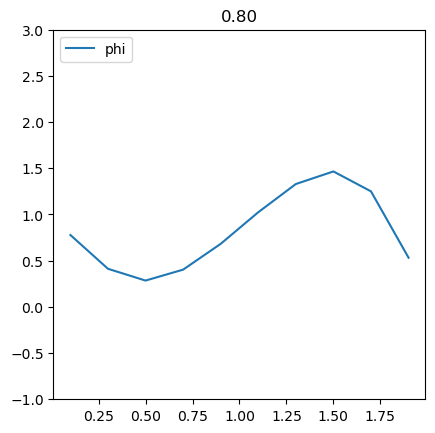

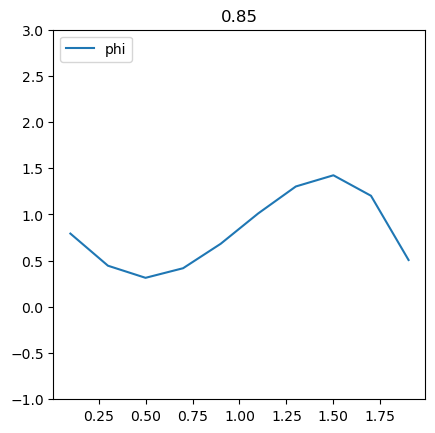

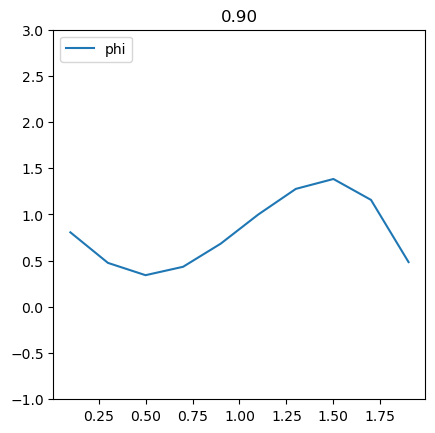

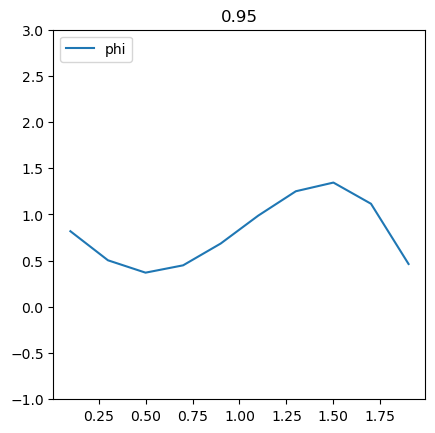

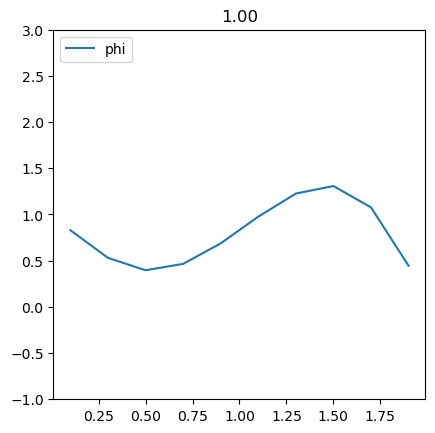

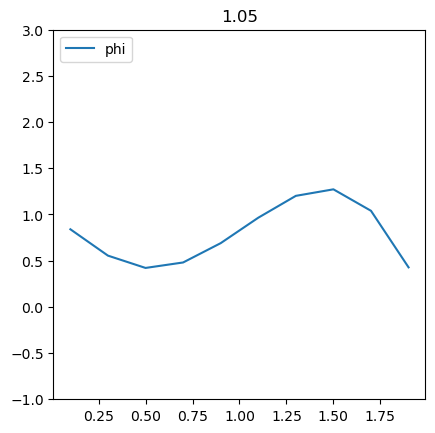

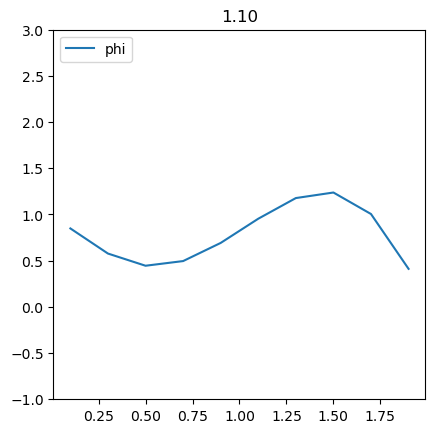

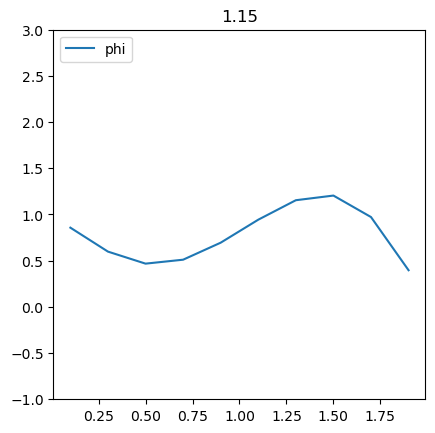

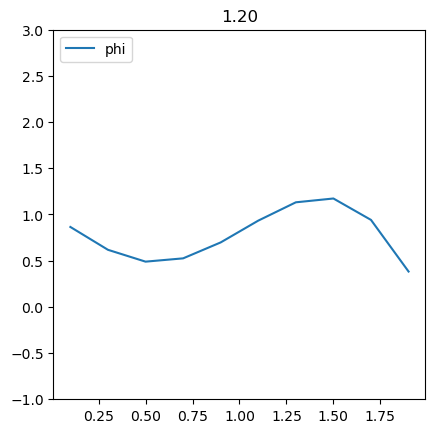

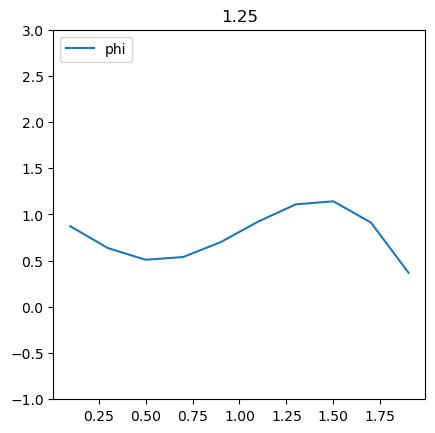

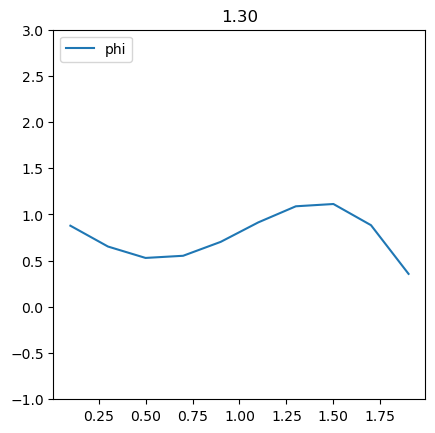

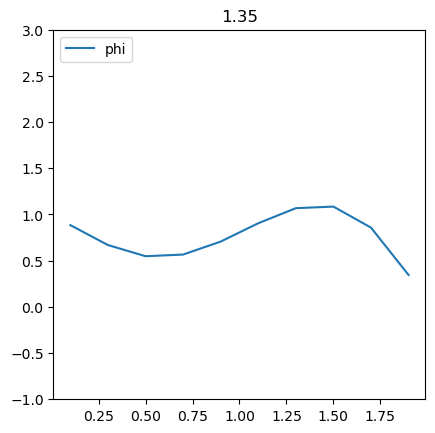

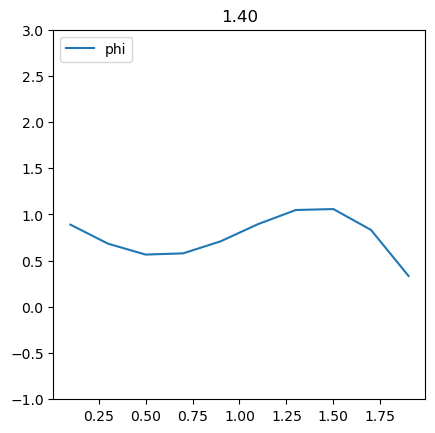

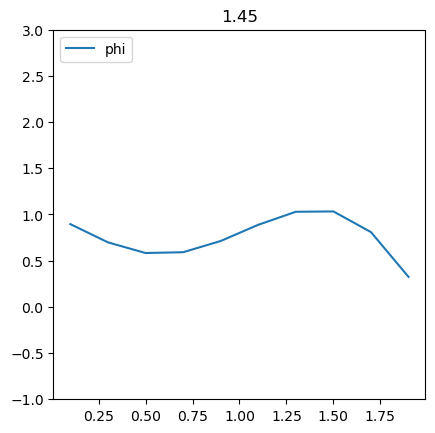

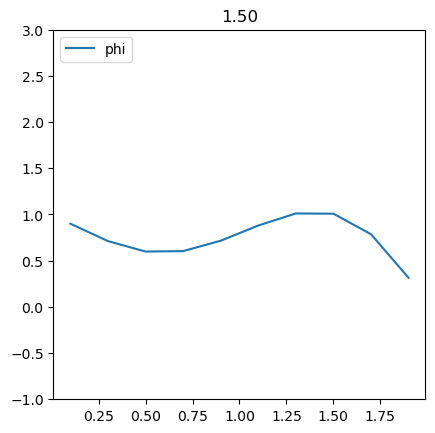

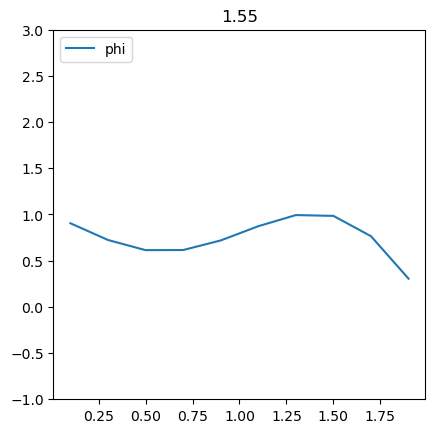

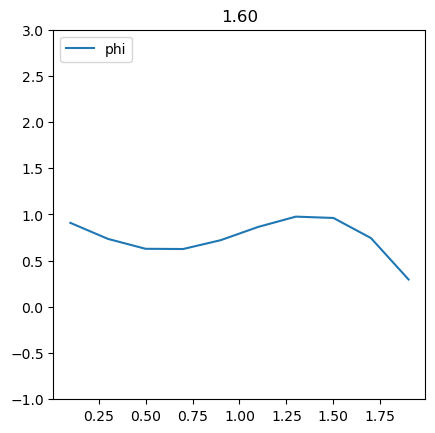

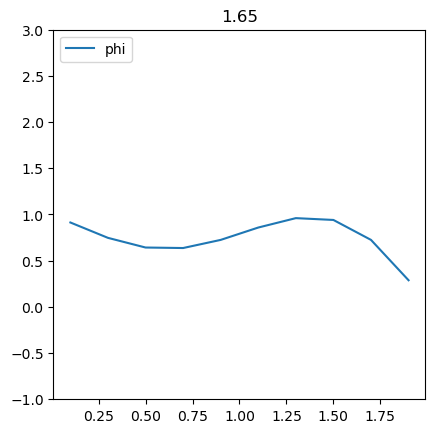

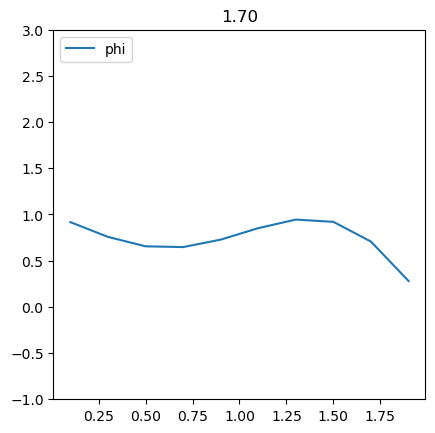

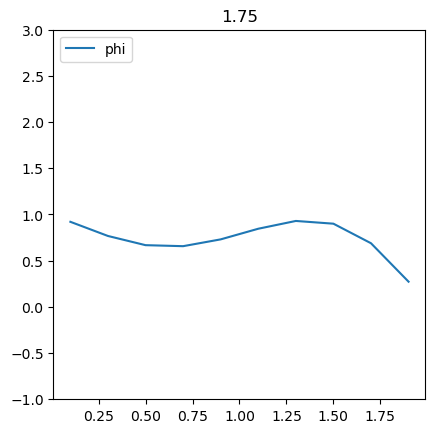

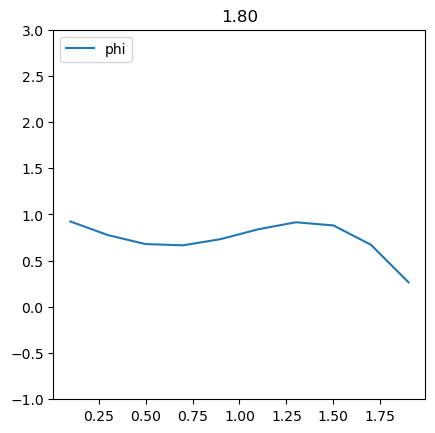

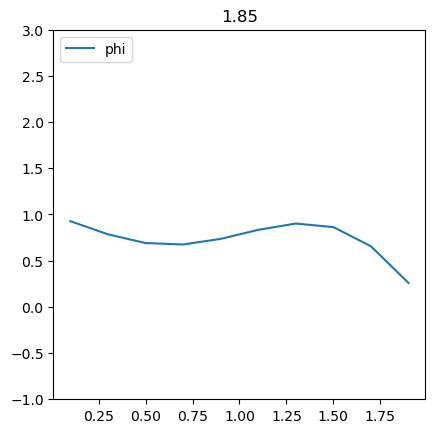

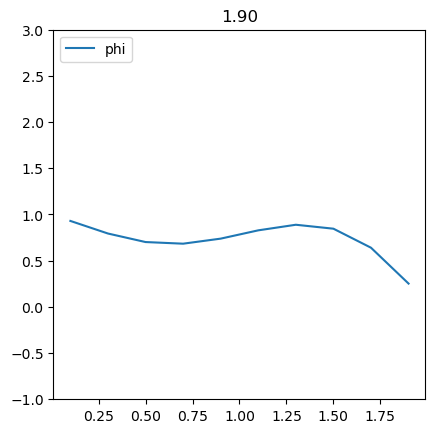

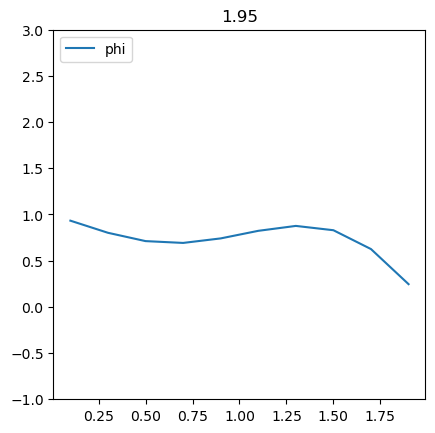

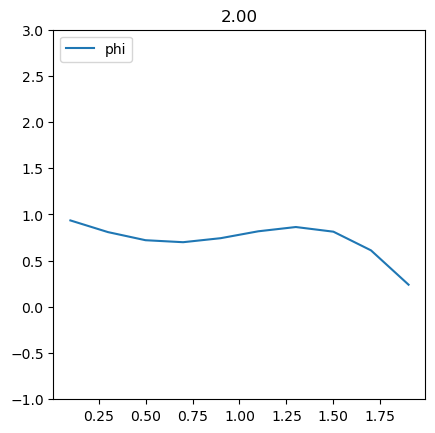

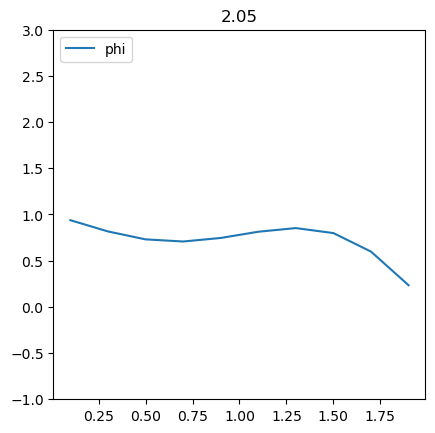

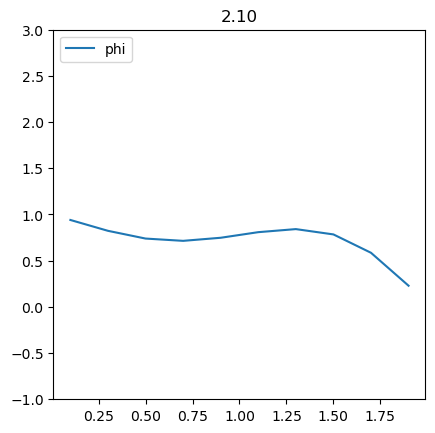

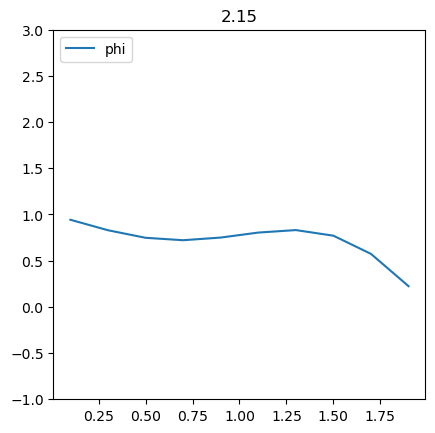

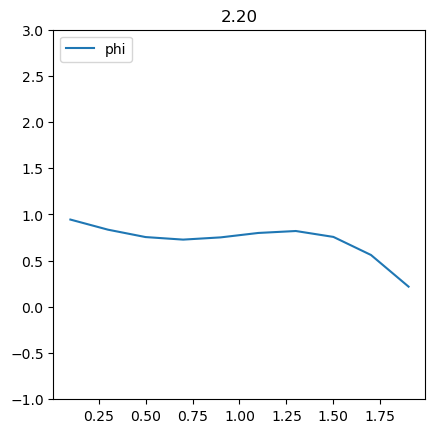

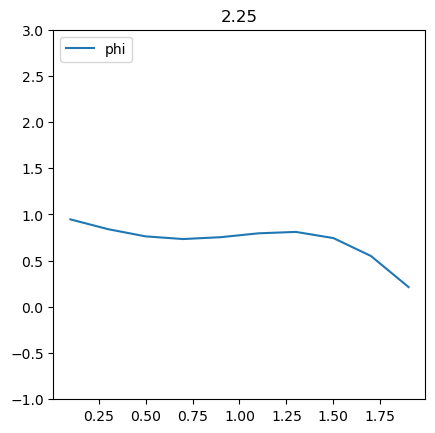

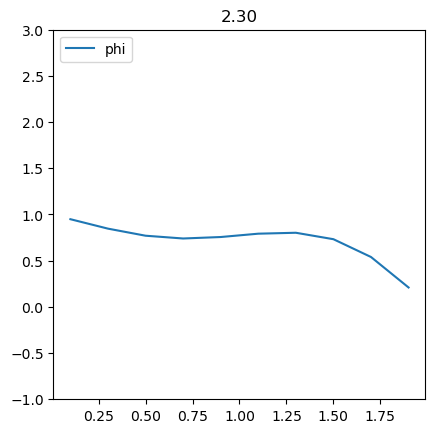

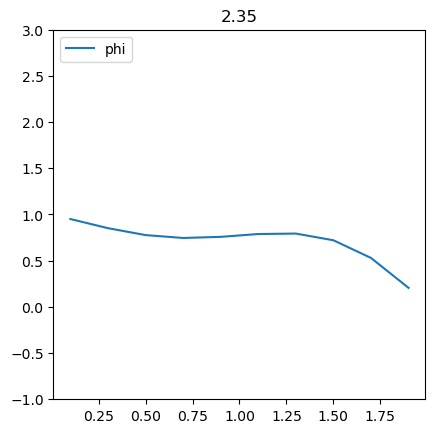

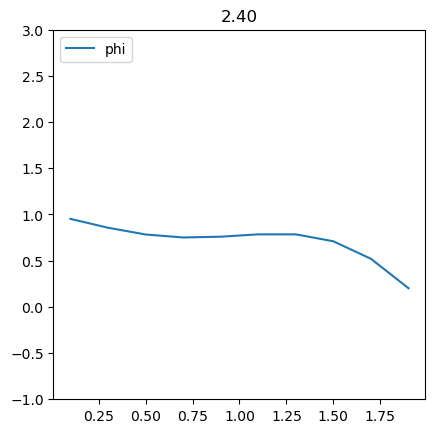

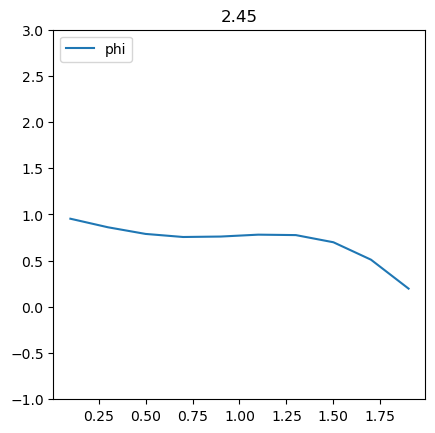

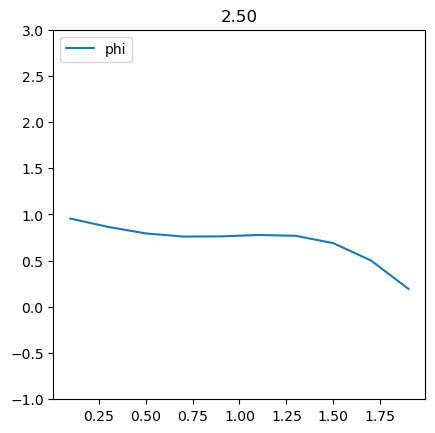

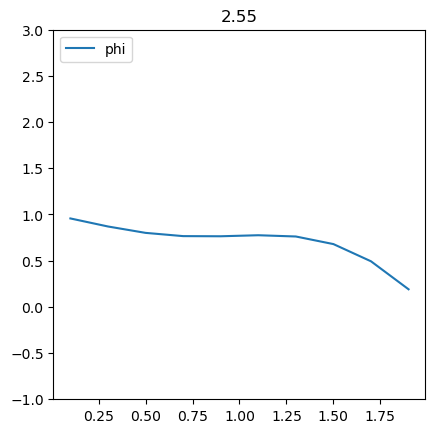

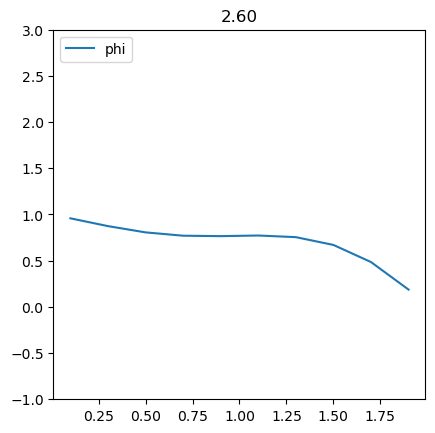

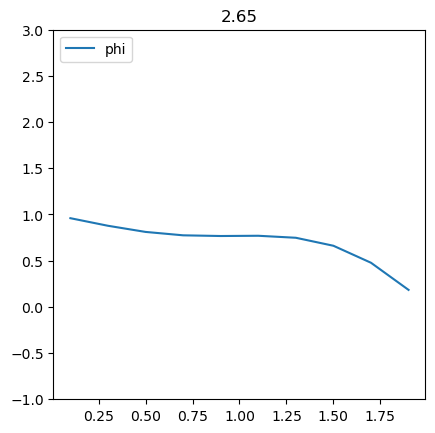

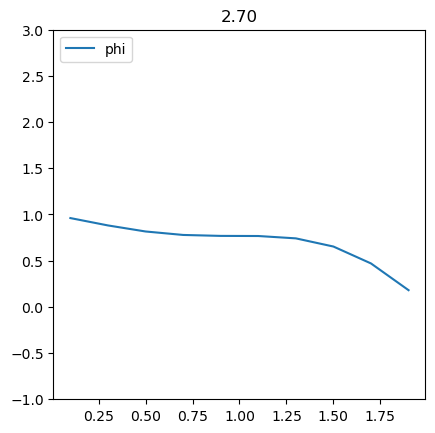

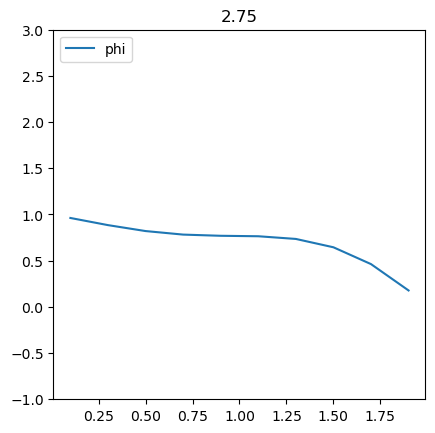

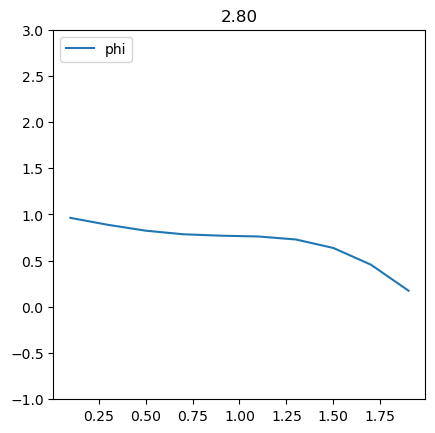

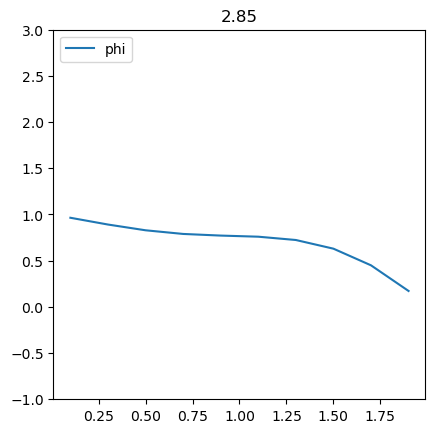

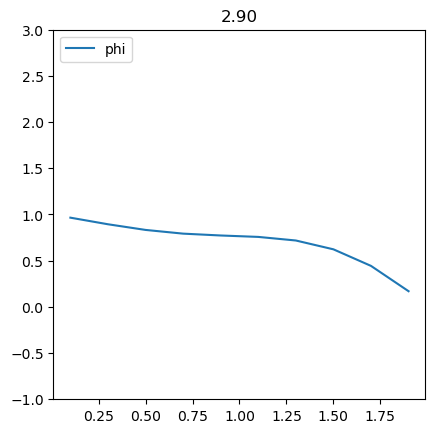

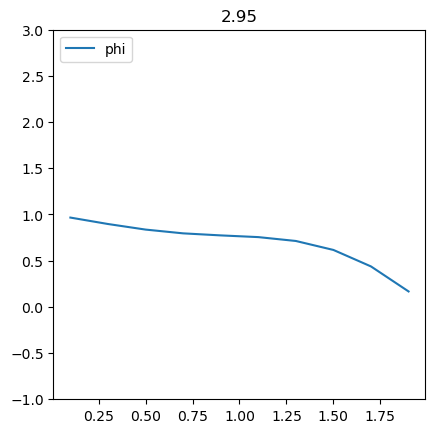

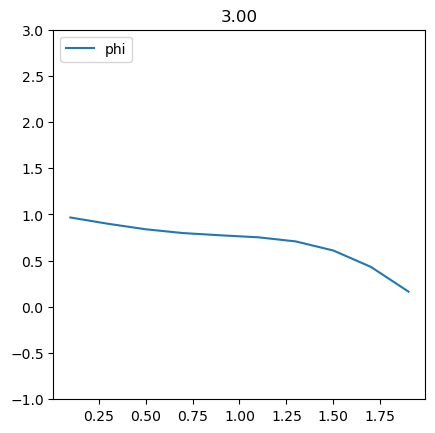

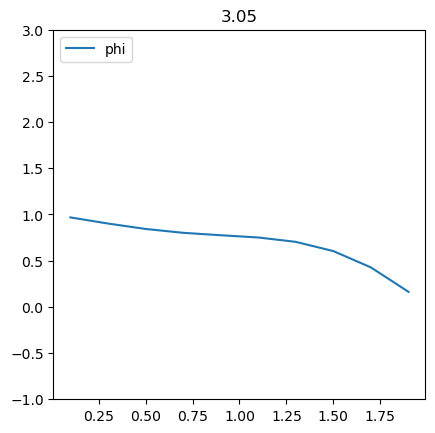

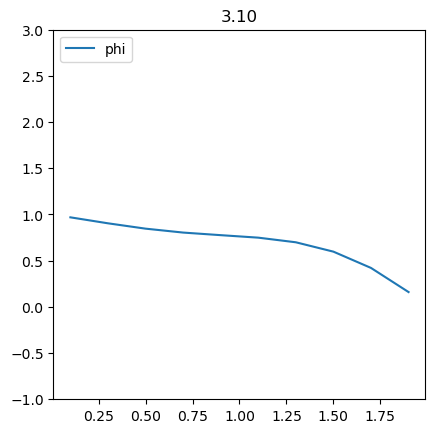

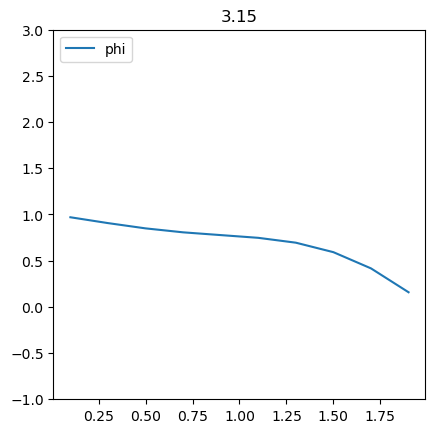

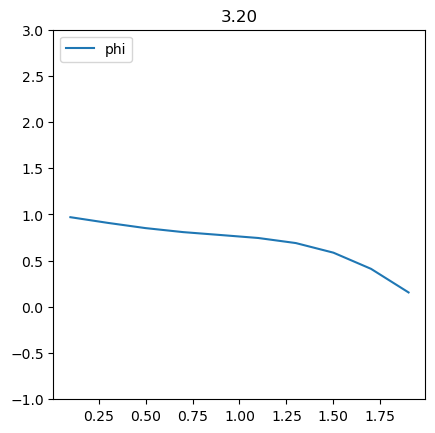

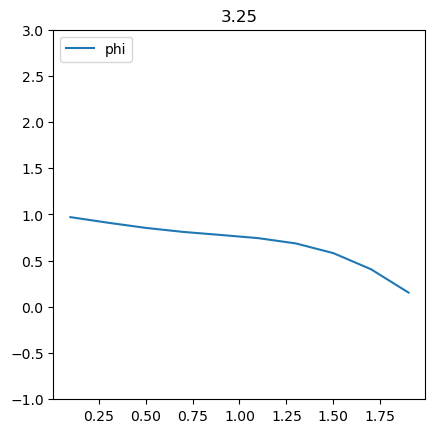

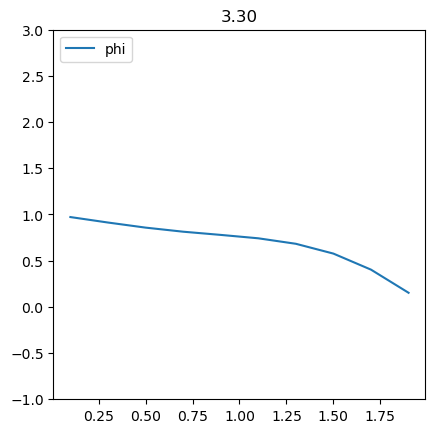

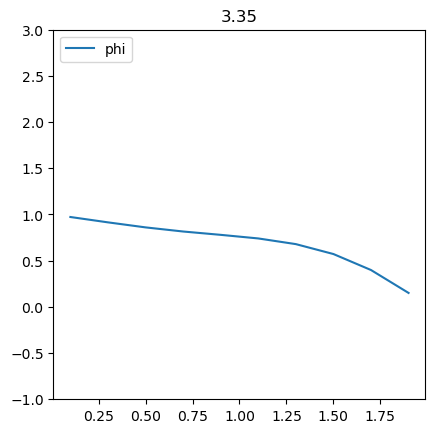

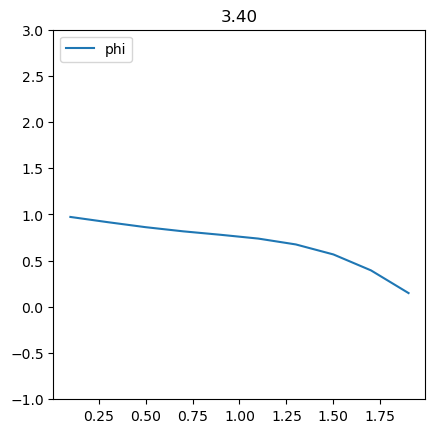

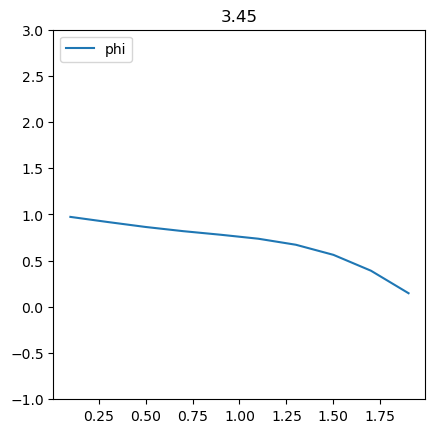

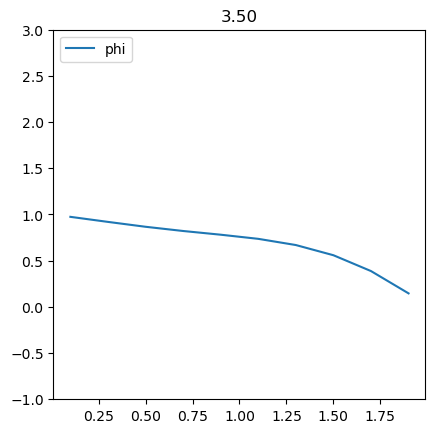

In [123]:
import time
for step in range(steps):
    phi.updateOld()
    eqn.solve(var=phi,
             dt=timeStepDuration)
    viewer = Viewer(vars=phi,datamax=3,datamin=-1, title=f'{(step+1)*timeStepDuration:.2f}')
    viewer.plot()
    time.sleep(0.1)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:00<00:00, 157.26it/s]


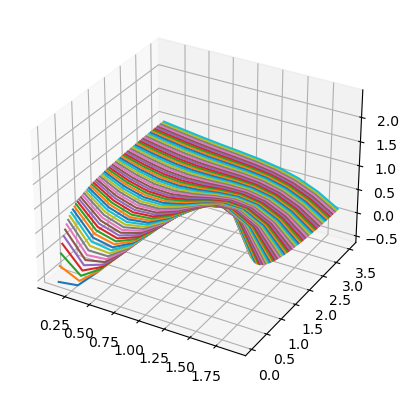

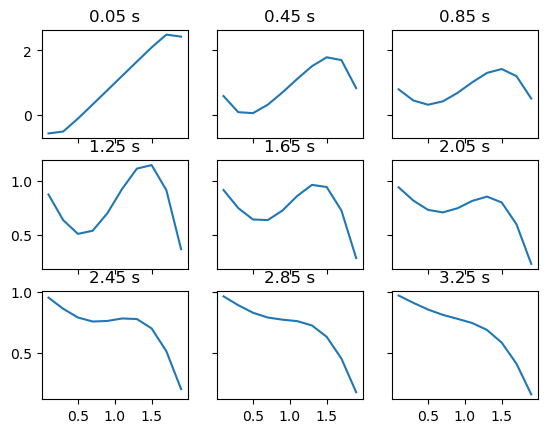

Text(0.10787434422876362, 0.01445242171006699, '$\\phi$')

In [128]:
# 重置phi
phi.value=f_phi0(mesh.x.value)

from tqdm import tqdm  # 绘制进度条
from matplotlib import pyplot as plt
from fipy.tools import numerix

time_point = []
result = []
for step in tqdm(range(steps)):
    phi.updateOld()
    eqn.solve(var=phi,
              dt=timeStepDuration)
    time_point.append(((step + 1) * timeStepDuration).__round__(2))
    result.append(phi.value.copy())
result = numerix.asarray(result)
pos, time_point = numerix.meshgrid(mesh.x.value, time_point)
ax1 = plt.axes(projection='3d')
fig2, ax2 = plt.subplots(3, 3, sharex='all', sharey='row')
plt.subplots_adjust(hspace=0.2)

for ind, tp in enumerate(time_point):
    ax1.plot(pos[ind], tp, result[ind])
    interval = steps // 3 ** 2 + 1
    if ind % interval == 0:
        r, c = divmod(ind // interval, 3)
        ax2[r, c].plot(pos[ind], result[ind])
        ax2[r, c].set_title(f'{tp[0]} s')
plt.show()
ax1.set_xlabel('x')
ax1.set_ylabel('t')
ax1.set_zlabel(r'$\phi$')

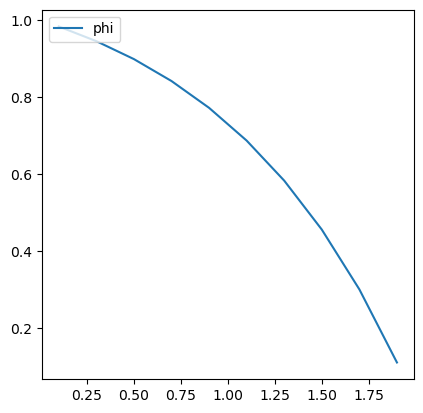

In [131]:
steady_eqn = HybridConvectionTerm(coeff=convCoeff) == DiffusionTerm(coeff=diffCoeff)
steady_eqn.solve(var=phi)
viewer = Viewer(vars=phi)